In [1]:
import pandas as pd
import numpy as np
import math
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4


# Пропущенные (отсутствующие) значения. Часть 1

# Missing values - NaN (Not a Number), None, pd.NA

## Чаще всего в pandas мы встречаем специальное значение NaN (np.nan) для обозначения отсутствия данных

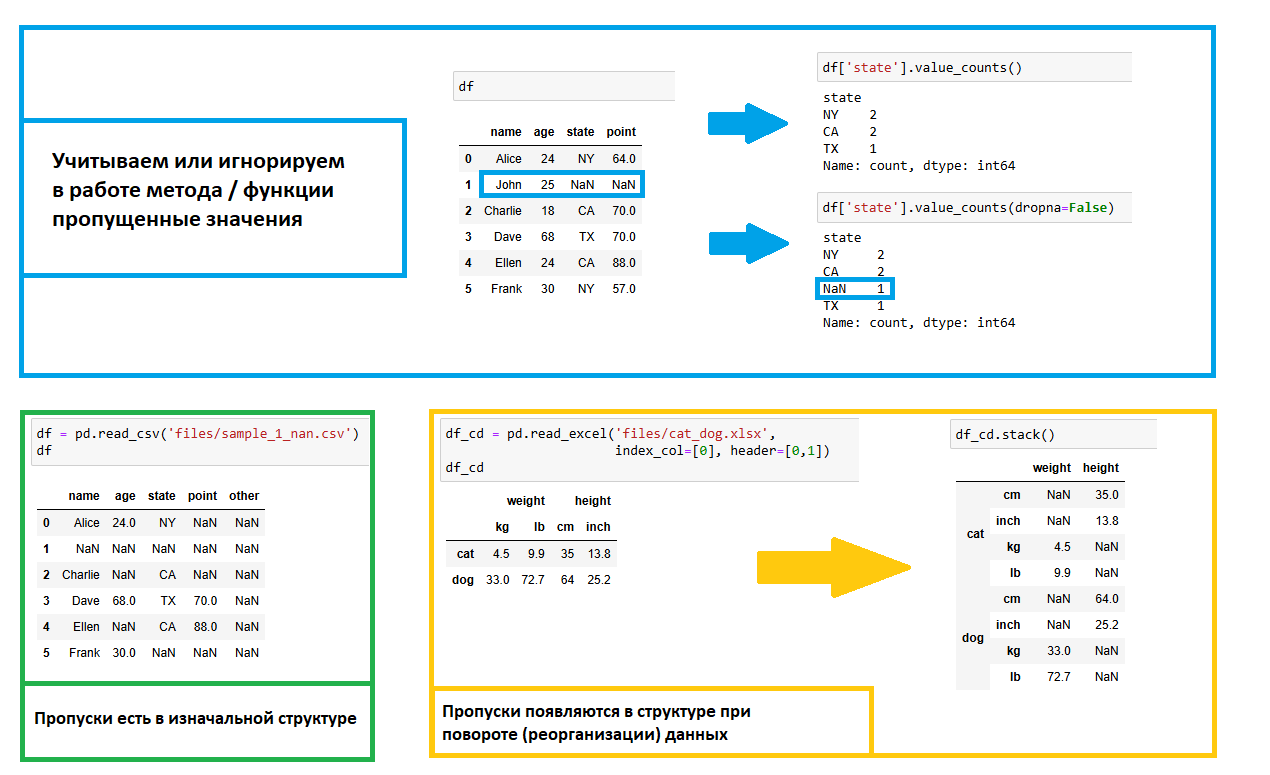

In [2]:
Image('files/missing_values.png')

## Как еще могут выглядеть отсутствующие данные в структурах Series или DataFrame? 
## Какие значения кроме NaN мы можем увидеть в качестве пропущенных значений?

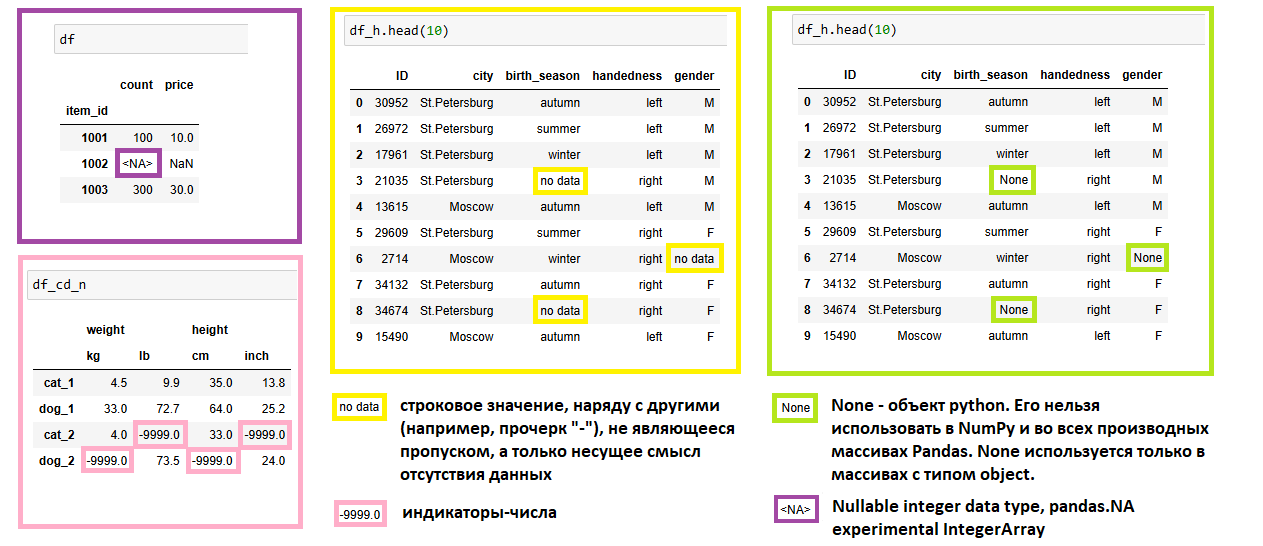

In [3]:
Image('files/missing_values_.png')

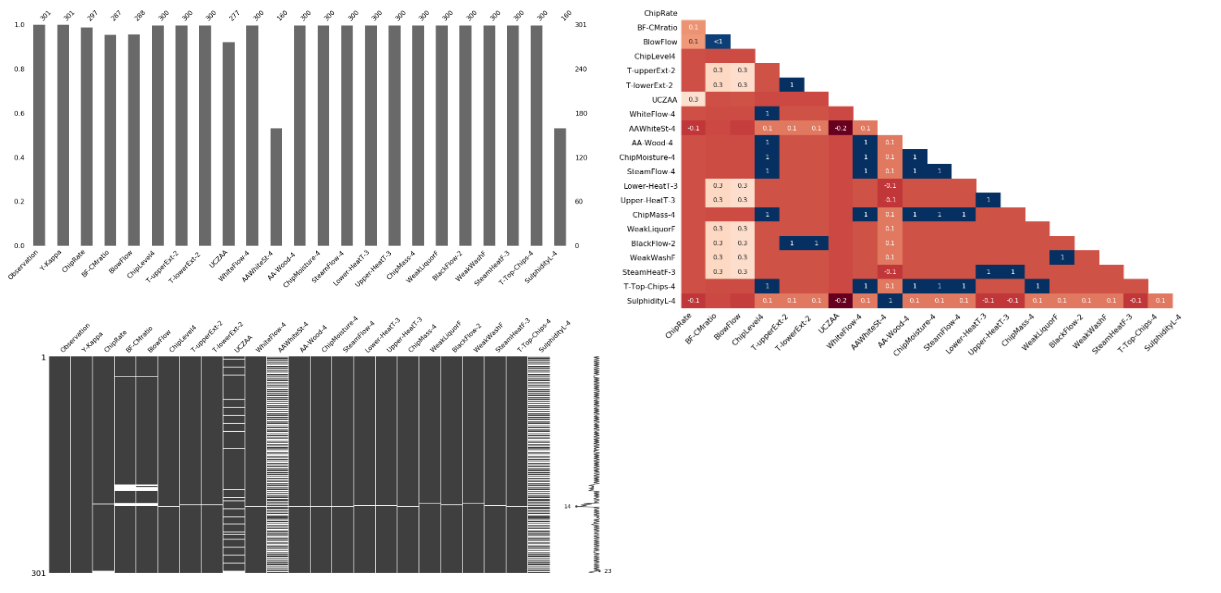

In [4]:
# библиотека для визуализации отсутствующих данных - Missingno
# import missingno as msno 
# df = pd.read_csv('file.csv')
# msno.matrix(df)
# msno.bar(df)
# msno.heatmap(df)
Image('files/missingno.png')

### Объект None

_None - объект python. Его нельзя использовать в NumPy и во всех производных массивах Pandas. None используется только в массивах с типом object. Тип object в данном случае означает, что NumPy не смог установить тип объектов массива, единственное что он знает — это то, что это объекты python. Операции с такими массивами будут производиться на уровне языка python, т.е. со всеми накладными расходами, присущими языку с динамической типизацией. Оптимизация NumPy работать не будет._

In [9]:
type(None)

NoneType

### Объект NaN (not a number), np.nan

_Объект NaN определяет отсутствие числового значения с плавающей точкой. Это вызывает некоторые проблемы — если NaN попадает в числовой массив, все числа приводятся к типу float. Кроме того, все операции с NaN приводят к NaN, в том числе и функции агрегирования._

In [10]:
# для вызова объекта NaN нужен NumPy
np.nan

nan

In [11]:
# NaN имеет тип данных float
type(np.nan)

float

In [12]:
# Тип object означает, что NumPy не смог установить тип объектов массива, 
# единственное что он знает — это то, что это объекты python
print(pd.Series([np.nan, 'string', 35 ]), 
      pd.Series([None, 'string', 35 ]), sep='\n\n')

0       NaN
1    string
2        35
dtype: object

0      None
1    string
2        35
dtype: object


In [13]:
# если NaN попадает в числовой массив, все числа приводятся к типу float
print(pd.Series([np.nan, 15, 35 ]))
print()
# если None попадает в числовой массив, все числа приводятся к типу float, а None заменяется на NaN
print(pd.Series([None, 15, 35 ]))

0     NaN
1    15.0
2    35.0
dtype: float64

0     NaN
1    15.0
2    35.0
dtype: float64


### Nan и None в одном массиве

In [14]:
print(pd.Series([np.nan, 'string', 35, None]), # NumPy не смог установить тип объектов массива, поэтому object
      pd.Series([np.nan, True, False, None]),
      pd.Series([np.nan, None, 15, 35, None ]), sep='\n\n') 
# NumPy установил тип объектов массива как float, преобразовав None в NaN

0       NaN
1    string
2        35
3      None
dtype: object

0      NaN
1     True
2    False
3     None
dtype: object

0     NaN
1     NaN
2    15.0
3    35.0
4     NaN
dtype: float64


# Правила преобразований типов в Pandas

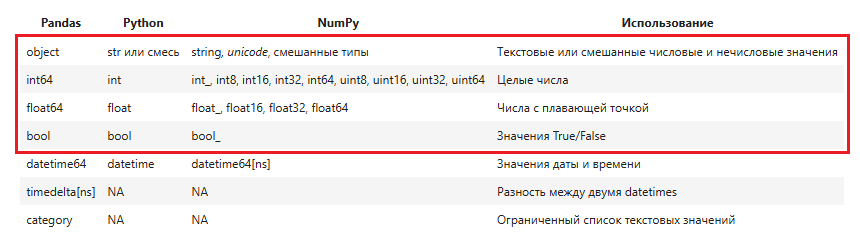

In [5]:
Image('files/dtypes_pandas.png')

1. Если изначально тип данных серии float, затем в ней появилось значение np.nan (None используется только в массивах с типом object), изменений типа не произойдет.
2. Если изначально тип данных серии object, затем в этой серии появилось значение np.nan или None, изменений типа не произойдет
3. Если изначально тип данных серии integer, затем в этой серии появилось значение np.nan (None используется только в массивах с типом object), тип данных серии и всех значений серии изменится на float64.
4. Если изначально тип данных серии bool, затем в этой серии появилось значение np.nan или None, тип данных серии изменится на object

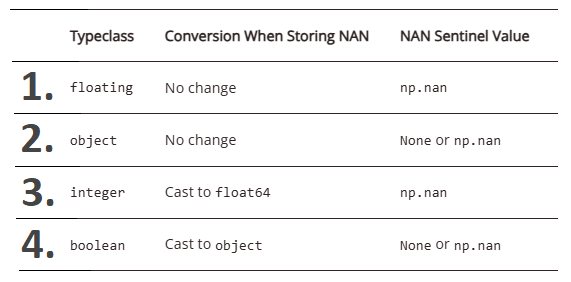

In [6]:
Image('files/dtype_NaN_None.png')

## NaN не равен самому себе

In [15]:
# NaN не равен самому себе
np.nan == np.nan

False

## Функции и методы для проверки, (не) является ли значение пропущенным (отсутствующим, пустым)

    np.isnan()
    
    pandas.notna()
    pandas.notnull()
    pandas.isna()
    pandas.isnull()
    
    DataFrame.notna()
    DataFrame.notnull (Alias of notna)
    DataFrame.isna (Boolean inverse of notna)
    DataFrame.isnull
    
    Series.notna
    Series.notnull 
    Series.isna
    Series.isnull
    
    Index.notna
    Index.isna

In [16]:
s_1 = pd.Series([np.nan, 35, np.nan, 25])
s_1

0     NaN
1    35.0
2     NaN
3    25.0
dtype: float64

In [17]:
display(s_1.notna(), # False - пропуск
        s_1.notnull(), # False - пропуск
        s_1.isna(), # True - пропуск
        s_1.isnull()) # True - пропуск

0    False
1     True
2    False
3     True
dtype: bool

0    False
1     True
2    False
3     True
dtype: bool

0     True
1    False
2     True
3    False
dtype: bool

0     True
1    False
2     True
3    False
dtype: bool

## pd.NA - экспериментальное значение. Рассматривается как отсутствующее значение
## Нулевой целочисленный тип данных (Nullable integer data type)

In [18]:
print(pd.NA)
print(type(pd.NA))

<NA>
<class 'pandas._libs.missing.NAType'>


In [19]:
s_na = pd.Series([None, 1, 2], dtype='Int64')
# тот же результат, если написать pd.Series([np.nan, 1, 2], dtype='Int64')
print(s_na)
print()
# конечно, pd.NA это отсутствующее значение
print(s_na.isnull())
# pd.NA == pd.NA - это pd.NA
print(pd.NA == pd.NA)

0    <NA>
1       1
2       2
dtype: Int64

0     True
1    False
2    False
dtype: bool
<NA>


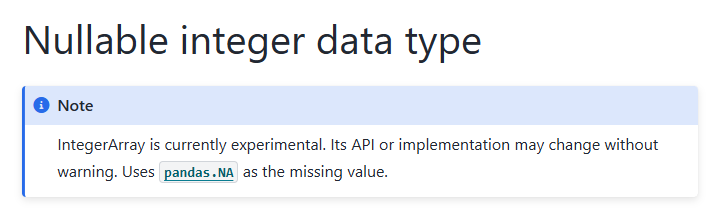

In [8]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html
Image('files/nullable_integer_data_type.png')

## Строка не считается пропущенным значением

In [20]:
s_str = pd.Series(['NaN', 'None', '', 'null'])
print(s_str)
print()
print(s_str.isnull())

0     NaN
1    None
2        
3    null
dtype: object

0    False
1    False
2    False
3    False
dtype: bool


## Если вы хотите рассматривать определенные значения как отсутствующие

In [21]:
# вы можете использовать метод replace(), чтобы строковые значения на реальные пропуски (float('nan'), np.nan или math.nan).
# Если нужно произвести сохранить изменение в изначальной структуре s_str, то используем inplace=True.
s_replace = s_str.replace(['NaN', 'None', '', 'null'], float('nan')) # s_str.replace(['NaN', 'None', ''], np.nan)
print(s_replace)
print()
print(s_replace.isnull())

0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

0    True
1    True
2    True
3    True
dtype: bool


## Функции для чтения файлов, такие как read_csv(), по умолчанию считают строки '', 'NaN', 'null' и т. д. отсутствующими значениями и заменяют их на NaN.

In [22]:
print(s_str)
# записываем серию s_str в csv-файл
s_str.to_csv('files/s_str_nan')
# открываем файл после сохранения и обнаруживаем, что все значения преобразовались в NaN
s_str_new=pd.read_csv('files/s_str_nan', index_col=0)
display(s_str_new, s_str_new['0'])

0     NaN
1    None
2        
3    null
dtype: object


,0
0,NaN
1,NaN
2,NaN
3,NaN


0   NaN
1   NaN
2   NaN
3   NaN
Name: 0, dtype: float64

#### По умолчанию следующие значения интерпретируются как NaN при чтении файла:
" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NA", "NULL", "NaN", "None", "n/a", "nan", "null".

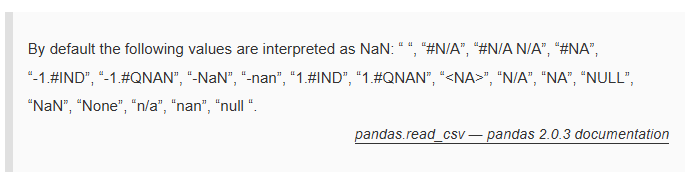

In [7]:
# Обратите внимание, что в этом перечне нет значения '-'
Image('files/read_csv_nan_by_default.png')

In [23]:
# создаем датафрейм с различными вариантами строковых значений, несущих смысл пропусков в данных
df_n = pd.DataFrame([['', 'NaN'], ['-', 'nan'], ['null', 'N/A']], 
             index=['ONE', 'TWO', 'THREE'], 
             columns=['a', 'b'])
df_n

,a,b
ONE,,NaN
TWO,-,nan
THREE,null,N/A


In [24]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, ONE to THREE
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       3 non-null      object
 1   b       3 non-null      object
dtypes: object(2)
memory usage: 72.0+ bytes


In [25]:
# сохраняем структуру df_n в csv-файл
df_n.to_csv('files/file_nan_1')
# открываем сохраненный файл
# функция read_csv интерпретировала все значения как пропуски, кроме значения '-'
df_n_new=pd.read_csv('files/file_nan_1', index_col=[0])
df_n_new

,a,b
ONE,NaN,NaN
TWO,-,NaN
THREE,NaN,NaN


In [26]:
# проверяем, какие из значений структуры DataFrame являются пропусками в данных 
# Убедились, что значение '-' пропуском не является
df_n_new.isnull()

,a,b
ONE,True,True
TWO,False,True
THREE,True,True


## Укажите значения, которые будут рассматриваться как NaN. 
## Используем при чтении файла параметры na_values, keep_default_na. 

In [27]:
# открываем файл file_nan_1 повторно, только в этот раз, указываем еще одно значение, которое нужно прочесть как пропуск
# для этого указываем в параметре na_values='-'
df_n_new_set_na = pd.read_csv('files/file_nan_1',
                            index_col=0, na_values='-')
df_n_new_set_na

,a,b
ONE,NaN,NaN
TWO,NaN,NaN
THREE,NaN,NaN


In [28]:
# теперь все значения, включая '-', при чтении интерпретируются как NaN
df_n_new_set_na.isnull()

,a,b
ONE,True,True
TWO,True,True
THREE,True,True


In [29]:
# Если задать аргумент keep_default_na равным False, то значения по умолчанию, указанные выше, не будут рассматриваться как NaN.
# Если в этом случае указать аргумент na_values, то только значения, указанные в na_values, будут рассматриваться как NaN.
df_n_no_keep = pd.read_csv('files/file_nan_1',
                             index_col=0, na_values=['-', 'NaN', 'null'],
                             keep_default_na=False)
df_n_no_keep

,a,b
ONE,,NaN
TWO,NaN,nan
THREE,NaN,N/A


In [30]:
df_n_no_keep.isnull()

,a,b
ONE,False,True
TWO,True,False
THREE,True,False


## Если не хотим ни одного отсутствующего значения в результате чтения файла

In [31]:
## Чтобы все значения при чтении файла были ненулевыми независимо от установки аргументов na_values и keep_default_na
## Устанавливаем параметр na_filter = False

df_n_no_filter = pd.read_csv('files/file_nan_1',
                               index_col=0, na_filter=False)
df_n_no_filter

,a,b
ONE,,NaN
TWO,-,nan
THREE,null,N/A


In [32]:
df_n_no_filter.isnull()

,a,b
ONE,False,False
TWO,False,False
THREE,False,False


In [33]:
values_nan = [np.nan, float('nan'), math.nan, pd.NA, None] # относятся к пропущенным значениям
values_not_nan = ['', '-', 'NaN', 'None', 'null', 'N/A', 'NA', 'NULL'] # не относятся к пропущенным значениям
print(values_nan)
print()
print(values_not_nan)
display(pd.isnull(values_nan), pd.isnull(values_not_nan))

[nan, nan, nan, <NA>, None]

['', '-', 'NaN', 'None', 'null', 'N/A', 'NA', 'NULL']


array([ True,  True,  True,  True,  True])

array([False, False, False, False, False, False, False, False])